In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
games = pd.read_parquet(r'C:\Users\User\OneDrive\Documents\Trabajo\Henry\Proyecto Ind. 1\Datos Limpios\steam_games.parquet')
full = pd.read_parquet(r'C:\Users\User\OneDrive\Documents\Trabajo\Henry\Proyecto Ind. 1\Datos Limpios\full_data.parquet')

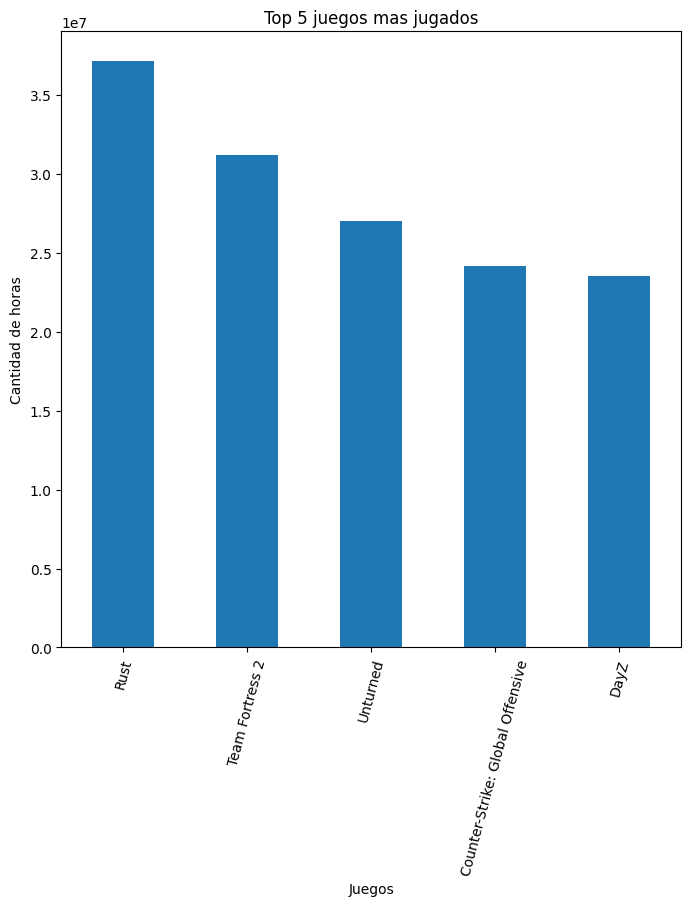

In [3]:
top_5 = full[['title','playtime_forever']].groupby('title').sum()
juego_mas_jugado = top_5['playtime_forever'].sort_values(ascending=False).head(5)
plt.subplots(figsize=(8, 8))
juego_mas_jugado.plot(kind='bar')
plt.title('Top 5 juegos mas jugados')
plt.xlabel('Juegos')
plt.ylabel('Cantidad de horas')
plt.xticks(rotation=75)
plt.show()

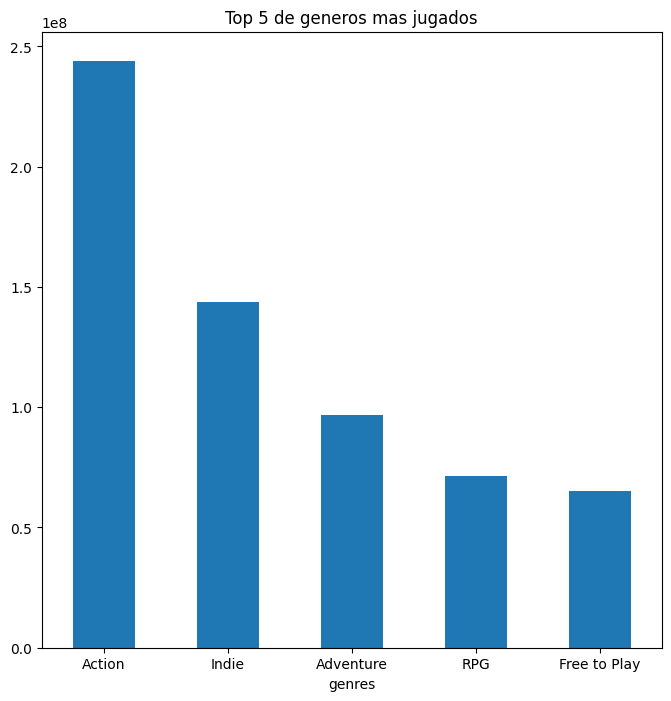

In [4]:
top_5_generos = full[['genres','playtime_forever']].groupby('genres').sum()
genero_mas_jugado = top_5_generos['playtime_forever'].sort_values(ascending=False).head(5)
plt.subplots(figsize=(8, 8))
genero_mas_jugado.plot(kind='bar')
plt.title('Top 5 de generos mas jugados')
plt.xticks(rotation=0)
plt.show()

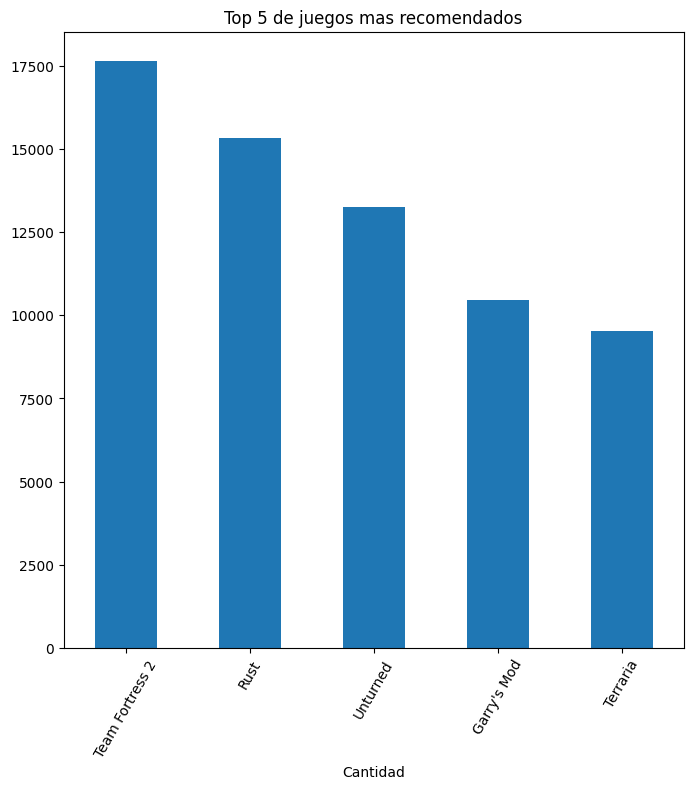

In [5]:
recomendado = full[full['recommend']==True]
juegos_recomendados = recomendado.groupby(['title'])['recommend'].count().sort_values(ascending= False).head(5)
plt.subplots(figsize=(8, 8))
juegos_recomendados.plot(kind='bar')
plt.title('Top 5 de juegos mas recomendados')
plt.xlabel('Cantidad')
plt.xticks(rotation = 60)
plt.show()

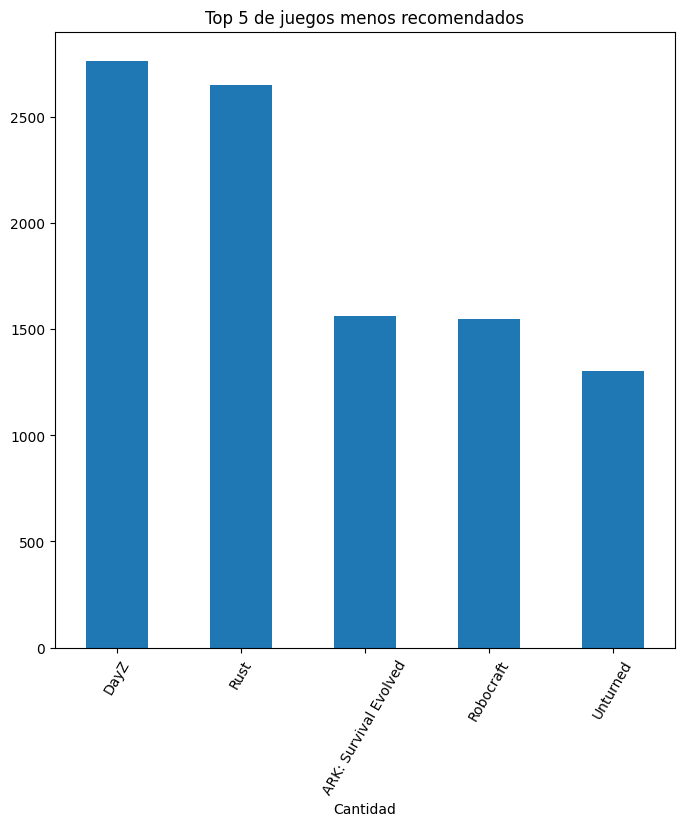

In [6]:
no_recomendado = full[full['recommend']==False]
juegos_no_recomendados = no_recomendado.groupby(['title'])['recommend'].count().sort_values(ascending= False).head(5)
plt.subplots(figsize=(8, 8))
juegos_no_recomendados.plot(kind='bar')
plt.title('Top 5 de juegos menos recomendados')
plt.xlabel('Cantidad')
plt.xticks(rotation = 60)
plt.show()

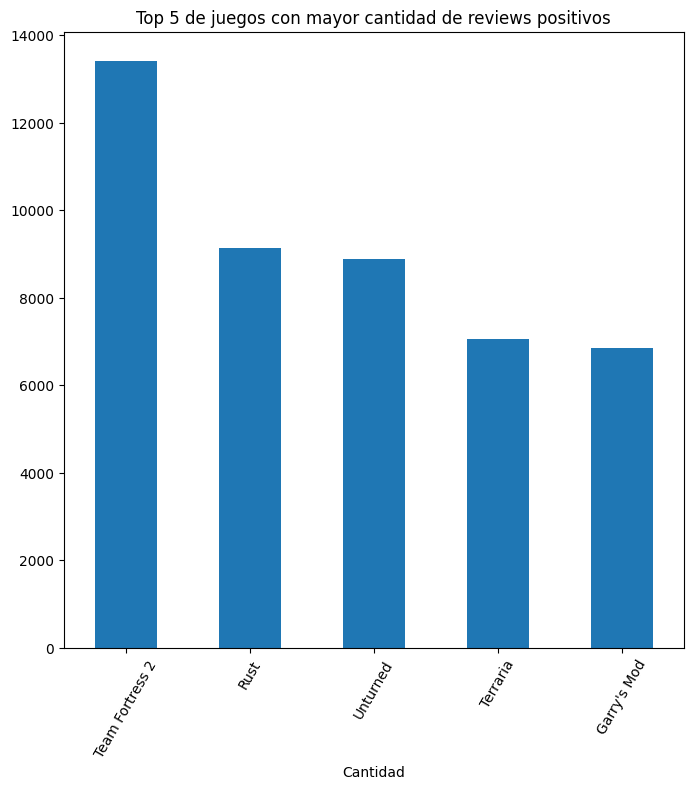

In [7]:
positivas = full[full['sentiment_analysis']==2]
juegosAnalysis = positivas[['title', 'sentiment_analysis']].groupby('title')['sentiment_analysis'].sum().sort_values(ascending=False).head(5)
plt.subplots(figsize=(8, 8))
juegosAnalysis.plot(kind='bar')
plt.title('Top 5 de juegos con mayor cantidad de reviews positivos')
plt.xlabel('Cantidad')
plt.xticks(rotation = 60)
plt.show()

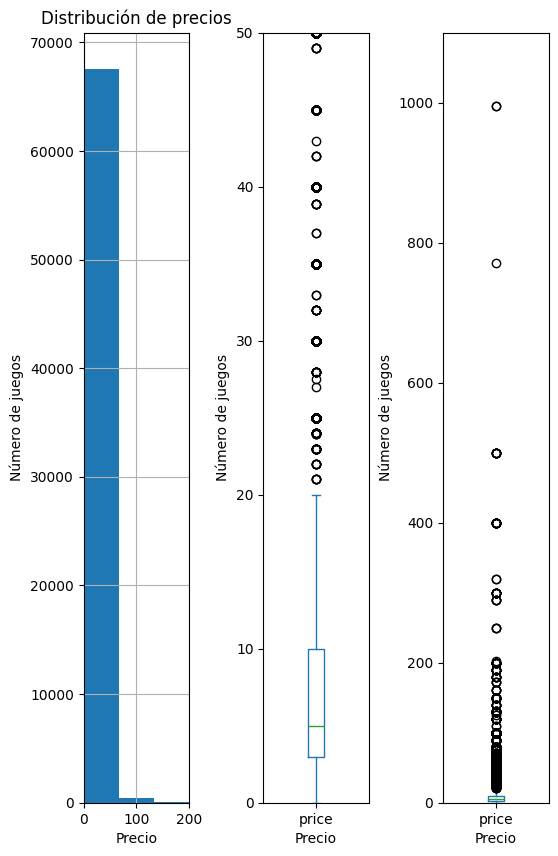

In [8]:
plt.subplot(1,3,1)
games['price'].hist(bins = 15, figsize=(6,10))
plt.title('Distribución de precios')
plt.xlabel('Precio')
plt.ylabel('Número de juegos')
plt.xlim(0, 200)

'////////////////////////////////////////////////////////////////////////////////////////////////////////////'

plt.subplot(1,3,2)
games['price'].plot.box()
plt.xlabel('Precio')
plt.ylabel('Número de juegos')
plt.ylim(0,50)

'/////////////////////////////////////////////////////////////////////////////////////////////////////////////'

plt.subplot(1,3,3)
games['price'].plot.box()
plt.xlabel('Precio')
plt.ylabel('Número de juegos')
plt.ylim(0, 1100 )

'////////////////////////////////////////////////////////////////////////////////////////////////////////////'

plt.subplots_adjust(wspace=0.7)
plt.show()

In [9]:
desarrolladores=full['developer'].unique()
nuevo={}
for x in desarrolladores:
    nuevo[x]=0


In [10]:
for x, p in full[['developer','price']].values:
    for i in desarrolladores:
        if i==x:
            nuevo[i]+=p

In [11]:
df = pd.DataFrame(list(nuevo.items()), columns=['Desarrollador', 'Ganancias'])

In [12]:
df_top_5=df.sort_values(by='Ganancias',ascending=False).head()

In [13]:
df_top_5

,Desarrollador,Ganancias
7,Bohemia Interactive,587068.46
5,Facepunch Studios,466433.08
12,"Studio Wildcard,Instinct Games,Efecto Studios,...",336803.11
4,Valve,293533.63
2,Chucklefish,119170.50


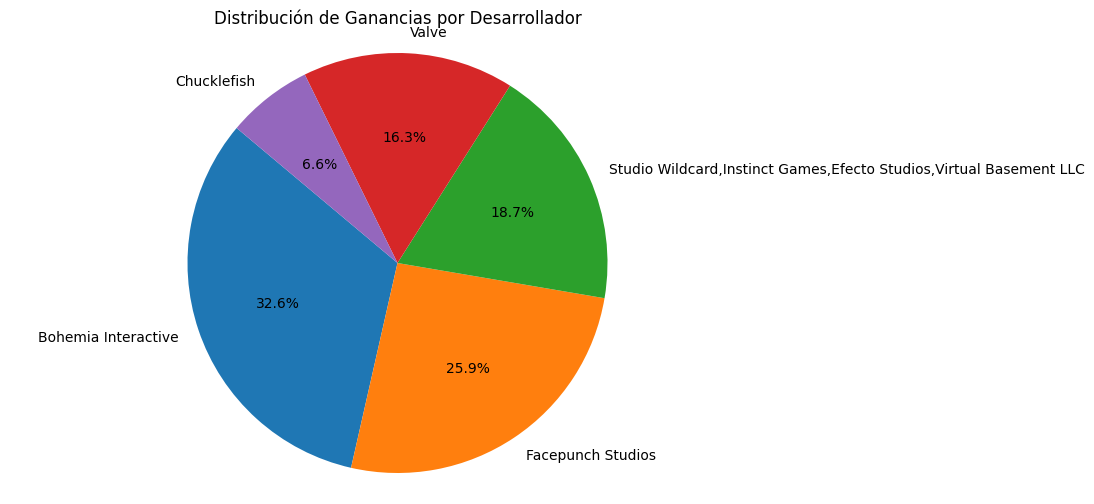

In [14]:
plt.figure(figsize=(10, 6))
plt.pie(df_top_5['Ganancias'], labels=df_top_5['Desarrollador'], autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Ganancias por Desarrollador')
plt.axis('equal')

plt.show()